In [331]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars

In [327]:
import pandas as pd
from pandas import Series,DataFrame
df=pd.read_csv("infy.csv",parse_dates=['Date'])#parse_date to convertdate format to yyyy-mm-dd
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,2015-06-01,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94
1,INFY,EQ,2015-06-02,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96
2,INFY,EQ,2015-06-03,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03
3,INFY,EQ,2015-06-04,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54
4,INFY,EQ,2015-06-05,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22


In [303]:
#making another data frame and made date as index formaking time-series implemantation easy
#if function doesn't have date then pandas have date_range() to create it
df2=pd.read_csv("infy.csv",parse_dates=['Date'],index_col="Date")

In [304]:
def avg(data):
    a=[4,16,28,40,52]
    d_avg=[]
    for i in a:
        d_avg.append(df['Close Price'][0:i*7].mean())
    return d_avg
        

In [305]:
#1 task
d=avg(df2['Close Price'])
print(d)

[1356.3482142857144, 1164.1901785714283, 1137.4515306122441, 1151.1957661290314, 1151.1957661290314]


In [306]:
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2015-06-01,INFY,EQ,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94
2015-06-02,INFY,EQ,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96
2015-06-03,INFY,EQ,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03
2015-06-04,INFY,EQ,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54
2015-06-05,INFY,EQ,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22


#some extra related visualization

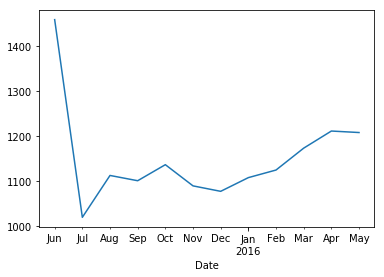

In [307]:
%matplotlib inline
df2["Close Price"].resample('M').mean().plot() #month eng frequency plot

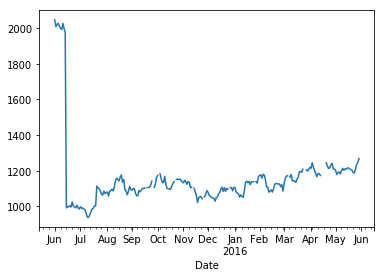

In [308]:
#visualisation for Bissness day  plot(excluding & handling holidays)
df2["Close Price"].resample('B').mean().plot()

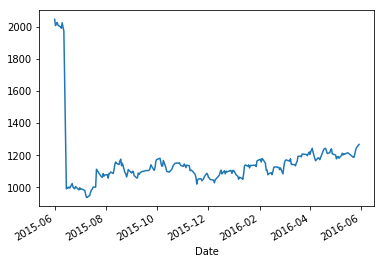

In [309]:
df2["Close Price"].plot()#regular chart

**#part1
#task2**

In [310]:
#rolling window means using some ample of data from whole range of data
#with size 10 & 75
df10=df2[0:10]
df75=df2[0:75]

#from pandas.tseries.holiday import USFederalHolidayCalendar
#indias celender is not in pandas we can create holidays of it
#In india sunday is holiday so i use mask sunday(we can do better)
#let say 2 july also an holiday(assume)
# so all sundays and selected holidays we can handle in this way

In [311]:
from pandas.tseries.offsets import CustomBusinessDay
hh=CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat',holidays=['2017-07-02'])


In [312]:
r1=pd.date_range(start="6/1/2015",end="6/11/2015",freq=hh)
df10.set_index(r1,inplace=True)
df10.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2015-06-01,INFY,EQ,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94
2015-06-02,INFY,EQ,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96
2015-06-03,INFY,EQ,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03
2015-06-04,INFY,EQ,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54
2015-06-05,INFY,EQ,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22


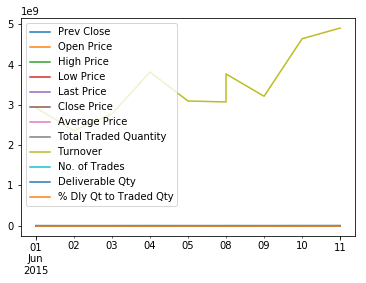

In [313]:
df10.plot()

In [314]:
r=pd.date_range(start="6/1/2015",end="8/26/2015",freq=hh)
df75.set_index(r,inplace=True)
df75.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2015-06-01,INFY,EQ,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94
2015-06-02,INFY,EQ,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96
2015-06-03,INFY,EQ,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03
2015-06-04,INFY,EQ,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54
2015-06-05,INFY,EQ,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22


In [315]:
r=pd.date_range(start="6/1/2015",end="3/15/2016",freq=hh)
df2.set_index(r,inplace=True)
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2015-06-01,INFY,EQ,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94
2015-06-02,INFY,EQ,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96
2015-06-03,INFY,EQ,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03
2015-06-04,INFY,EQ,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54
2015-06-05,INFY,EQ,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22


In [336]:
#for rolling windowtask
df2['Rolling_Mean'] = df2['Close Price'].rolling(window = 10).mean()

In [337]:
#for rolling windowtask
df2['Rolling_Mean2'] = df2['Close Price'].rolling(window = 75).mean()

In [339]:
df2.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Volume Shocks,Price Shocks,Price black Swan,Price without volume,Rolling_Mean,Rolling_Mean2
2015-06-01,INFY,EQ,2023.15,2032.8,2064.0,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94,1,0,0,0,NaN,NaN
2015-06-02,INFY,EQ,2047.80,2048.1,2055.1,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96,0,1,1,1,NaN,NaN


In [338]:
#some extra on periods
#we give period on m which give 2016 and d is m+1 will give 2017
#so it fully aware of celender plus which year is leap year
#freq='M' means months ends
m=pd.Period('2016-12',freq='M')
s=m+1
print(m)#give 2016
print(s)#give 2017

2016-12
2017-01


In [317]:
#part1-task=3
#trying to do wdummy variables with function
#but some problem happns if got more time able to resolve
'''def dummy1(data):
    for i in range(len(data)-1):
        if data[i+1]-data[i] >2:
            a.append(1)
        else:
            a.append(0)
    a.append(0)
    se = pd.Series(a)
    return se'''
'''def dummy2(data1):
    a1=[]
    for i in range(1,len(data1)):
        if data1[i-1]-data1[i] >2:
            a1.append(1)
        else:
            a1.append(0)
    a1.append(0)
    se = pd.Series(a1)
    return se'''
'''a=[]
if df['No. of Trades'][1]-df['No. of Trades'][0] >2 :
    a.append(1)
a'''

"a=[]\nif df['No. of Trades'][1]-df['No. of Trades'][0] >2 :\n    a.append(1)\na"

In [318]:
#part1-task 3
a1=[]
for i in range(len(df2['No. of Trades'])-1):
    if df2['No. of Trades'][i+1]-df2['No. of Trades'][i] >10:
        a1.append(1)
    else:
        a1.append(0)
a1.append(0)
    #se = pd.Series(a)
df2['Volume Shocks']=a1


In [319]:
a2=[]
for i in range(len(df2['Close Price'])-1):
    if df2['Close Price'][i+1]-df2['Close Price'][i] >2:
        a2.append(1)
    else:
        a2.append(0)
a2.append(0)
    #se = pd.Series(a)
df2['Price Shocks']=a2

In [320]:
a3=[]
for i in range(len(df2['Close Price'])-1):
    if df2['Close Price'][i+1]-df2['Close Price'][i] >2:
        a3.append(1)
    else:
        a3.append(0)
a3.append(0)
df2['Price black Swan']=a3

In [321]:
print(df2['Volume Shocks'][2])#accessing values

1


In [322]:
b=[]
for i in range(len(df)):
    if df2['Volume Shocks'][i] ==0 and df2['Price Shocks'][i]==1:
        b.append(1)
        #print(1)
    else:
        b.append(0)
        #print(0)
df2['Price without volume']=b

# All dummy created

In [350]:
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Volume Shocks,Price Shocks,Price black Swan,Price without volume,Rolling_Mean,Rolling_Mean2
2015-06-01,INFY,EQ,2023.15,2032.8,2064.00,2023.25,2042.0,2047.80,2048.10,1431223,2.931285e+09,62717,1029588,71.94,1,0,0,0,NaN,NaN
2015-06-02,INFY,EQ,2047.80,2048.1,2055.10,2005.00,2013.0,2008.65,2018.63,1168285,2.358332e+09,67384,793960,67.96,0,1,1,1,NaN,NaN
2015-06-03,INFY,EQ,2008.65,2018.2,2039.45,2008.00,2032.0,2020.90,2019.78,1373949,2.775068e+09,50402,824814,60.03,1,1,1,0,NaN,NaN
2015-06-04,INFY,EQ,2020.90,2030.0,2055.00,2012.60,2028.1,2028.05,2036.59,1872366,3.813250e+09,98562,1395596,74.54,0,0,0,0,NaN,NaN
2015-06-05,INFY,EQ,2028.05,2030.0,2044.00,2008.15,2011.5,2011.65,2020.89,1531447,3.094883e+09,61438,1014160,66.22,0,0,0,0,NaN,NaN


# part2 -data visualization
1. Create timeseries plot of close prices of stocks/indices with the following features:
2. Color timeseries in simple blue color.
3. Color timeseries between two volume shocks in a different color (Red)
4. Gradient color in blue spectrum based on difference of 52 week moving average.
5. Mark closing Pricing shock without volume shock to identify volumeless price movement.
6. Hand craft partial autocorrelation plot for each stock/index on upto all lookbacks on bokeh

In [332]:
#52 week avg
d[-1]

1151.1957661290314

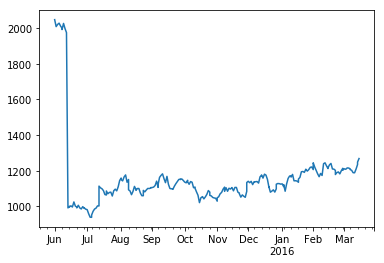

In [324]:
df2['Close Price'].plot()

/home/ayush/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


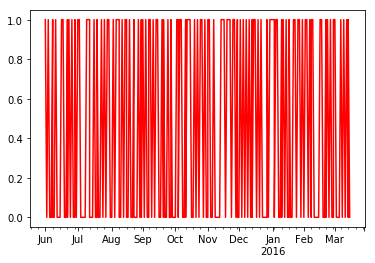

In [330]:
#2
df2['Volume Shocks'].plot(colors='Red')

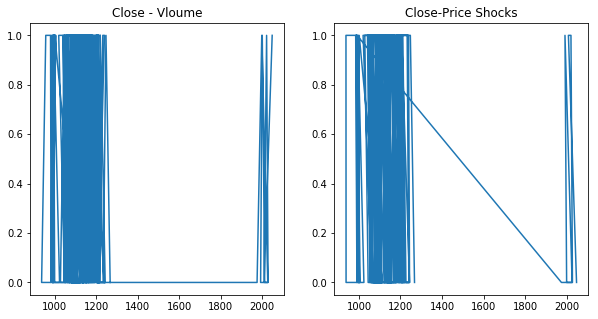

In [335]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Close Price', 'Volume Shocks', data = df2);
axes[0].set_title('Close - Vloume');
axes[1].plot('Close Price', 'Price Shocks', data = df2);
axes[1].set_title('Close-Price Shocks');

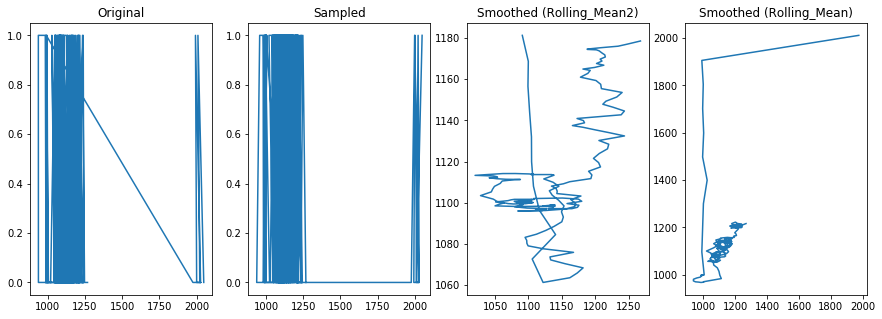

In [342]:
#4
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5));
axes[0].plot('Close Price', 'Price without volume', data = df2);
axes[0].set_title('Close Price without volume');
axes[1].plot('Close Price', 'Volume Shocks', data = df2);
axes[1].set_title('Sampled');
axes[2].plot('Close Price', 'Rolling_Mean2', data = df2);
axes[2].set_title('Smoothed (Rolling_Mean2)');
axes[3].plot('Close Price', 'Rolling_Mean', data = df2);
axes[3].set_title('Smoothed (Rolling_Mean)');

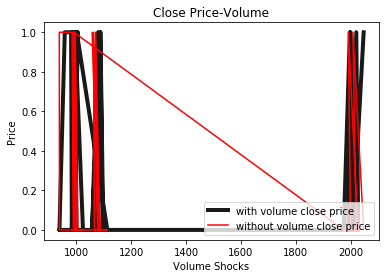

In [349]:
#1&2
fig = plt.figure();
ax = fig.add_subplot(111);
dd=df2[0:50] #samled data
ax.plot(dd['Close Price'], dd['Volume Shocks'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'with volume close price');
ax.plot(dd['Close Price'], dd['Price without volume'], color = (1,0,0), label = 'without volume close price');
ax.set_title('Close Price-Volume')
ax.set_xlabel('Volume Shocks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

# modeling

In [378]:
#part3-modeling
feature=['Prev Close','High Price','Low Price','Close Price','Rolling_Mean2']
df2_train=df2.drop(['Open Price','Symbol','Series','Rolling_Mean','Rolling_Mean2'],axis=1)
label=df2['Open Price']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df2_train,label, test_size = 0.2, random_state = 42)

In [379]:
l_reg=LinearRegression()
lasso_reg=LassoLars()

In [380]:
l_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [382]:

l_reg.score(X_test,y_test)

0.9977899095378261

In [383]:
lasso_reg.fit(X_train,y_train)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [384]:
lasso_reg.score(X_test,y_test)

0.990066397677656